In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from streaming.models.inputs import SimulationMeasurements
from streaming.models import stream
from compute_moments import gamma1, gamma2
import copy
import pickle

In [2]:
from streaming.moments.vary_moments import (ModifyMoments, 
                                            increase, decrease,
                                            gradual_increase, gradual_decrease,
                                           compute_alpha_beta)

In [3]:
import matplotlib.font_manager
import matplotlib as mpl
mpl.style.use('~/StreamingModel/streaming/utils/mplstyle')
from streaming.utils import plot_tools as pt


In [4]:
pdf_filename = "../data/pairwise_velocity_pdf.hdf5"
tpcf_filename = "../data/tpcf.hdf5"

simulation = SimulationMeasurements(pdf_filename, tpcf_filename)

simulation_stream = stream.Stream(simulation, model = 'measured')

skewt = stream.Stream(simulation, 'skewt')

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/h5py-2.9.0-py3.6-linux-x86_64.egg/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Found ST parameters from moments


In [5]:
percentage = 0.05
mf = ModifyMoments(simulation, percentage)

Varying tpcf
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Varying m_10
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Varying c_20


/cosma/local/Python/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/cosma/home/dp004/dc-cues1/StreamingModel/streaming/models/skewt/moments2pdf.py:105: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
/cosma/home/dp004/dc-cues1/StreamingModel/streaming/models/skewt/moments2pdf.py:113: RuntimeWarning: overflow encountered in double_scalars
  b_dof = (dof/np.pi)**0.5 * gamma(0.5*(dof - 1))/gamma(0.5*dof)
/cosma/local/Python/3.6.5/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Varying c_02
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments
Found ST parameters from moments


In [6]:
alpha,  beta = compute_alpha_beta(percentage)

## Varying by 5%

TypeError: gradual_increase() missing 2 required positional arguments: 'alpha' and 'beta'

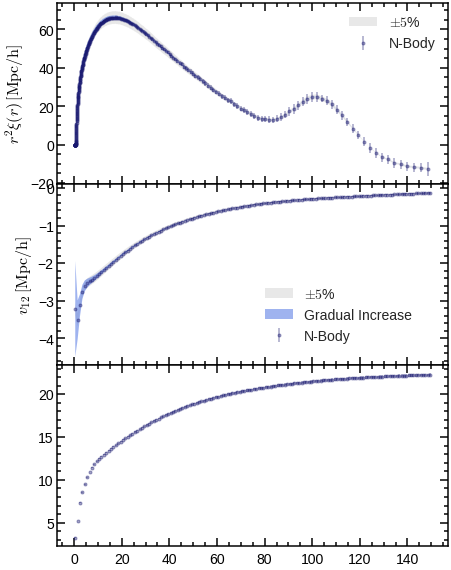

In [7]:
alpha_value = 0.4
alpha_facecolor = 0.5

color_percentage = 'lightgray'
color_gradual = 'royalblue'

fig, axes = plt.subplots(nrows=3,
                         ncols=1,sharex=True,
                        figsize = (7,10),
                         gridspec_kw = {'wspace':0, 'hspace':0})
# --------------- Tpcf --------------------------------------

axes[0].errorbar(simulation.r_tpcf, 
             simulation.r_tpcf**2*simulation.tpcf.mean(simulation.r_tpcf),
             yerr = simulation.r_tpcf**2*simulation.tpcf.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'N-Body', alpha = alpha_value)

axes[0].fill_between(simulation.r_tpcf,
                 simulation.r_tpcf**2*increase(simulation, 'tpcf', percentage)(simulation.r_tpcf),
                 simulation.r_tpcf**2*decrease(simulation, 'tpcf', percentage)(simulation.r_tpcf),
                 facecolor = color_percentage, alpha = 0.5, label = '$\pm 5$%'
                )

axes[0].fill_between(simulation.r_tpcf,
                 simulation.r_tpcf**2*gradual_increase(simulation, 'tpcf', alpha, beta)(simulation.r_tpcf),
                 simulation.r_tpcf**2*gradual_decrease(simulation, 'tpcf', alpha, beta)(simulation.r_tpcf),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[0].set_ylabel(r'$r^2\xi(r) \, \mathrm{[Mpc/h]}$')
axes[0].legend()

# --------------- Mean --------------------------------------

axes[1].errorbar(simulation.r, 
             simulation.m_10.mean(simulation.r),
             yerr = simulation.m_10.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'N-Body', alpha = alpha_value)

axes[1].fill_between(simulation.r,
                 increase(simulation, 'm_10', percentage = percentage)(simulation.r),
                 decrease(simulation, 'm_10', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor, label =  '$\pm 5$%'
                )
axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'm_10', alpha, beta)(simulation.r),
                 gradual_decrease(simulation, 'm_10', alpha, beta)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor, label = 'Gradual Increase'
                )

axes[1].set_ylabel('$v_{12} \, \mathrm{[Mpc/h]}$')
axes[1].legend( bbox_to_anchor = (0.5,0.5), frameon=False)

# --------------- STD --------------------------------------

axes[2].errorbar(simulation.r, 
             simulation.c_20.mean(simulation.r),
             yerr = simulation.c_20.std, linestyle = '',
             marker = 'o', color = 'midnightblue',
             label = 'Radial', alpha = alpha_value)

axes[2].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_20')(simulation.r),
                 gradual_decrease(simulation, 'c_20')(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[2].fill_between(simulation.r,
                 increase(simulation, 'c_20', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_20', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

axes[2].errorbar(simulation.r, 
             simulation.c_02.mean(simulation.r), linestyle = '',
             yerr = simulation.c_02.std,marker = 'o', alpha = alpha_value,
             color = 'slategray', label = 'Tangential')


axes[2].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_02', alpha, beta)(simulation.r),
                 gradual_decrease(simulation, 'c_02', alpha, beta)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[2].fill_between(simulation.r,
                 increase(simulation, 'c_02', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_02', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

axes[2].set_ylabel('$\sigma_{12}^2 \, \mathrm{[Mpc/h]^2}$')



In [ ]:
moments = ['tpcf',
           'm_10', 
           'c_20', 'c_02', 
          ]

multipoles = ['monopole', 'quadrupole', 'hexadecapole']

axes_names = [r'$\Delta \xi$',
              '$\Delta m_{10}$',
              '$\Delta c_{20}$',
              '$\Delta c_{02}$',
            ]


In [ ]:
fig, axes = plt.subplots(nrows= len(moments), ncols = 3, sharex = True, 
                         sharey=True, squeeze = True,
   gridspec_kw = {'wspace':0.1, 'hspace':0.2}, figsize = (14,10))


for k, multipole in enumerate(multipoles):
    for i, moment in enumerate(moments):
        moment_instance = getattr(mf, moment)

        axes[i,k].fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.2)
        axes[i,k].axhline(y =0.95, color = 'maroon', linestyle = '--', alpha = 0.4)
        axes[i,k].axhline(y = 1.05, color = 'maroon', linestyle = '--', alpha = 0.4)

        axes[i, k].fill_between(simulation.s_c,

                     getattr(moment_instance.increase, multipole)/ getattr(skewt, multipole),
                     getattr(moment_instance.decrease, multipole)/ getattr(skewt, multipole),
                     facecolor = color_percentage,
                     alpha = 0.55)

        axes[i, k].fill_between(simulation.s_c,

                     getattr(moment_instance.gradual_increase, multipole)/ getattr(skewt, multipole),
                     getattr(moment_instance.gradual_decrease, multipole)/ getattr(skewt, multipole),
                     facecolor = color_gradual,
                     alpha = 0.55)


        axes[i, k].set_ylim(0.9,1.1)
        axes[i, k].set_xlim(0.4, 49.1)
        if k ==0:
            axes[i, k].set_ylabel(axes_names[i])
        if i == len(moments)-1:
            axes[i,k].set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

        if i == 0:
            axes[i,k].set_title( r'$\hat{\xi}_{%d}/\xi_{%d}^{\mathrm{ST}}$'%(2*k, 2*k))

# For higher order moments, find the percentage increase that produces a 1% effect (similar to varying the mean) on the quadrupole

In [ ]:
percentage_higher_order = 0.3

mf_higher_order = ModifyMoments(simulation, percentage_higher_order,
                  moments_to_vary = ['c_30', 'c_12', 'c_22',
                                    'c_40', 'c_04'])

alpha_higher_order, beta_higher_order = compute_alpha_beta(percentage_higher_order)

In [ ]:
fig, axes = plt.subplots(nrows=2,
                         ncols=1,sharex=True,
                        figsize = (7,7),
                         gridspec_kw = {'wspace':0, 'hspace':0})

# --------------- Skewness --------------------------------------

axes[0].errorbar(simulation.r, 
             simulation.c_30.mean(simulation.r),
             yerr = simulation.c_30.std, linestyle = '',
                 marker = 'o', alpha = alpha_value,
            color = 'midnightblue', label = 'Radial')

axes[0].fill_between(simulation.r,
                 increase(simulation, 'c_30', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_30', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

axes[0].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_30', alpha_higher_order, beta_higher_order)(simulation.r),
                 gradual_decrease(simulation, 'c_30', alpha_higher_order, beta_higher_order)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[0].errorbar(simulation.r, 
             simulation.c_12.mean(simulation.r), linestyle = '',
             marker = 'o', alpha = alpha_value,
             yerr = simulation.c_12.std,
            color = 'orange', label = 'Cross Radial-Tangential')

axes[0].fill_between(simulation.r,
                 increase(simulation, 'c_12', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_12', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

axes[0].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_12', alpha_higher_order, beta_higher_order)(simulation.r),
                 gradual_decrease(simulation, 'c_12', alpha_higher_order, beta_higher_order)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[0].set_ylabel('$s_3 \, \mathrm{[Mpc/h]^3}$')

# --------------- Kurtosis --------------------------------------

axes[1].errorbar(simulation.r, 
             simulation.c_40.mean(simulation.r),
             yerr = simulation.c_40.std, linestyle = '',
                 marker = 'o', alpha = alpha_value,
            color = 'midnightblue', label = 'Radial',
            capsize=0)

axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_40', alpha_higher_order, beta_higher_order)(simulation.r),
                 gradual_decrease(simulation, 'c_40', alpha_higher_order, beta_higher_order)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[1].fill_between(simulation.r,
                 increase(simulation, 'c_40', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_40', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

          
axes[1].errorbar(simulation.r, 
             simulation.c_04.mean(simulation.r),
             yerr = simulation.c_04.std, linestyle = '',
                 marker = 'o', alpha = alpha_value,
            color = 'slategray', label = 'Tangential')

axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_04', alpha_higher_order, beta_higher_order)(simulation.r),
                 gradual_decrease(simulation, 'c_04', alpha_higher_order, beta_higher_order)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[1].fill_between(simulation.r,
                 increase(simulation, 'c_04', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_04', percentage = percentage)(simulation.r),
                 facecolor = color_percentage, alpha = alpha_facecolor
                )

axes[1].errorbar(simulation.r, 
             simulation.c_22.mean(simulation.r),
             yerr = simulation.c_22.std, linestyle = '',
                marker = 'o', alpha = alpha_value,
            color = 'orange', label = 'Cross Radial-Tangential')

axes[1].fill_between(simulation.r,
                 gradual_increase(simulation, 'c_22', alpha_higher_order, beta_higher_order)(simulation.r),
                 gradual_decrease(simulation, 'c_22', alpha_higher_order, beta_higher_order)(simulation.r),
                 facecolor = color_gradual, alpha = alpha_facecolor
                )

axes[1].fill_between(simulation.r,
                 increase(simulation, 'c_22', percentage = percentage)(simulation.r),
                 decrease(simulation, 'c_22', percentage = percentage)(simulation.r),
                 facecolor =color_percentage , alpha = alpha_facecolor
                )

axes[1].set_ylabel('$s_4 \, \mathrm{[Mpc/h]^4}$')

axes[1].set_xlabel('$r \, \, \mathrm{[Mpc/h]}$')

In [ ]:
moments = ['c_30', 'c_12', 
           'c_40', 'c_04', 'c_22']

multipoles = ['monopole', 'quadrupole', 'hexadecapole']

axes_names = ['$\Delta c_{30}$',
              '$\Delta c_{12}$',
              '$\Delta c_{22}$',
              '$\Delta c_{40}$',
              '$\Delta c_{04}$',
            ]


In [ ]:
fig, axes = plt.subplots(nrows= len(moments), ncols = 3, sharex = True, 
                         sharey=True, squeeze = True,
   gridspec_kw = {'wspace':0.1, 'hspace':0.2}, figsize = (14,10))


for k, multipole in enumerate(multipoles):
    for i, moment in enumerate(moments):
        moment_instance = getattr(mf_higher_order, moment)

        axes[i,k].fill_between(simulation.s_c,0.99, 1.01, facecolor = 'yellow', alpha = 0.2)
        axes[i,k].axhline(y =0.95, color = 'maroon', linestyle = '--', alpha = 0.4)
        axes[i,k].axhline(y = 1.05, color = 'maroon', linestyle = '--', alpha = 0.4)

        axes[i, k].fill_between(simulation.s_c,

                     getattr(moment_instance.increase, multipole)/ getattr(skewt, multipole),
                     getattr(moment_instance.decrease, multipole)/ getattr(skewt, multipole),
                     facecolor = color_percentage,
                     alpha = 0.55)

        axes[i, k].fill_between(simulation.s_c,

                     getattr(moment_instance.gradual_increase, multipole)/ getattr(skewt, multipole),
                     getattr(moment_instance.gradual_decrease, multipole)/ getattr(skewt, multipole),
                     facecolor = color_gradual,
                     alpha = 0.55)


        axes[i, k].set_ylim(0.9,1.1)
        axes[i, k].set_xlim(0.4, 49.1)
        if k ==0:
            axes[i, k].set_ylabel(axes_names[i])
        if i == len(moments)-1:
            axes[i,k].set_xlabel('$s \, \, \mathrm{[Mpc/h]}$')

        if i == 0:
            axes[i,k].set_title( r'$\hat{\xi}_{%d}/\xi_{%d}^{\mathrm{ST}}$'%(2*k, 2*k))

In [ ]:
moments = ['tpcf',
           'm_10', 
           'c_20', 'c_02', 
           'c_30', 'c_12', 
           'c_40', 'c_04', 'c_22']

multipoles = ['monopole', 'quadrupole', 'hexadecapole']

axes_names = [r'$\Delta \xi$',
              '$\Delta m_{10}$',
              '$\Delta c_{20}$',
              '$\Delta c_{02}$',
              '$\Delta c_{30}$',
              '$\Delta c_{12}$',
              '$\Delta c_{22}$',
              '$\Delta c_{40}$',
              '$\Delta c_{04}$',
            ]



In [16]:
from scipy.optimize import fsolve

In [17]:
def equations(p):
    x, y = p
    
    return ( x - 0.05 * (5)**y, x - 0.01 * (30)**y)

In [18]:
x, y = fsolve(equations, (1,10))

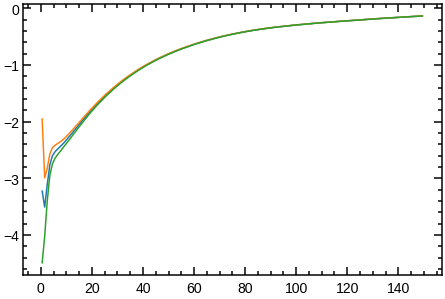

In [22]:
plt.plot(simulation.r, simulation.m_10.mean(simulation.r))
plt.plot(simulation.r, simulation.m_10.mean(simulation.r)*(1 - x/simulation.r**y))
plt.plot(simulation.r, simulation.m_10.mean(simulation.r)*(1 + x/simulation.r**y))